# Log Manager

Organize Log into readable information

In [ ]:
import json
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
filename = "../logs_test.txt"

lines = []
with open(filename, "r") as f:
    lines = f.readlines() 
    
lines[:5]

['[["134.82.247.217", 42706]]:{}\n',
 '[["134.82.247.217", 42706]]:{"max_gpu": 11016, "time_updated": "05/21/2021-16:57:29", "1643": {"name": "/usr/bin/X", "user": "root", "gpu_used": 229, "%cpu_used": 0.0, "%mem_used": 0.3, "command": "/usr/bin/X -core -noreset :0 -seat seat0 -auth /var/run/lightdm/root/:0 -nolisten tcp vt1 -novtswitch -background none"}}\n',
 '[server]: {"candidate_sent": {"x1": 4, "x2": 7, "id": 1}, "address": ["134.82.247.217", 42706]}\n',
 '[["134.82.247.215", 55860]]:{}\n',
 '[["134.82.247.215", 55860]]:{"max_gpu": 11019, "time_updated": "05/21/2021-16:57:38", "23731": {"name": "/usr/bin/X", "user": "root", "gpu_used": 229, "%cpu_used": 0.0, "%mem_used": 0.3, "command": "/usr/bin/X -core -noreset :0 -seat seat0 -auth /var/run/lightdm/root/:0 -nolisten tcp vt1 -novtswitch -background none"}}\n']

In [69]:
info = {}

for n in range(len(lines)):
    source = lines[n][:lines[n].index(':')]
    if "[server]" == source:
        ip, port = "server", -1
    else:
        ip, port = json.loads(source)[0]
    
    if ip not in info:
        info[ip] = {"port": port, "content": []}

    print(lines[n])
    content = json.loads(lines[n][lines[n].index(':')+1 : -1])
    info[ip]["content"].append(content)

[["134.82.247.217", 42706]]:{}

[["134.82.247.217", 42706]]:{"max_gpu": 11016, "time_updated": "05/21/2021-16:57:29", "1643": {"name": "/usr/bin/X", "user": "root", "gpu_used": 229, "%cpu_used": 0.0, "%mem_used": 0.3, "command": "/usr/bin/X -core -noreset :0 -seat seat0 -auth /var/run/lightdm/root/:0 -nolisten tcp vt1 -novtswitch -background none"}}

[server]: {"candidate_sent": {"x1": 4, "x2": 7, "id": 1}, "address": ["134.82.247.217", 42706]}

[["134.82.247.215", 55860]]:{}

[["134.82.247.215", 55860]]:{"max_gpu": 11019, "time_updated": "05/21/2021-16:57:38", "23731": {"name": "/usr/bin/X", "user": "root", "gpu_used": 229, "%cpu_used": 0.0, "%mem_used": 0.3, "command": "/usr/bin/X -core -noreset :0 -seat seat0 -auth /var/run/lightdm/root/:0 -nolisten tcp vt1 -novtswitch -background none"}}

[["134.82.247.213", 40766]]:{}

[["134.82.247.213", 40766]]:{"max_gpu": 11016, "time_updated": "05/21/2021-16:57:39", "14305": {"name": "/usr/bin/X", "user": "root", "gpu_used": 229, "%cpu_used": 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [70]:
for ip in info:
    print(f"IP: {ip}")
    pprint(info[ip]["content"])
    print("_______________")

IP: 134.82.247.217
[{},
 {'1643': {'%cpu_used': 0.0,
           '%mem_used': 0.3,
           'command': '/usr/bin/X -core -noreset :0 -seat seat0 -auth '
                      '/var/run/lightdm/root/:0 -nolisten tcp vt1 -novtswitch '
                      '-background none',
           'gpu_used': 229,
           'name': '/usr/bin/X',
           'user': 'root'},
  'max_gpu': 11016,
  'time_updated': '05/21/2021-16:57:29'},
 {},
 {'1643': {'%cpu_used': 0.0,
           '%mem_used': 0.3,
           'command': '/usr/bin/X -core -noreset :0 -seat seat0 -auth '
                      '/var/run/lightdm/root/:0 -nolisten tcp vt1 -novtswitch '
                      '-background none',
           'gpu_used': 229,
           'name': '/usr/bin/X',
           'user': 'root'},
  'max_gpu': 11016,
  'time_updated': '05/25/2021-11:08:17'},
 {},
 {'1643': {'%cpu_used': 0.0,
           '%mem_used': 0.3,
           'command': '/usr/bin/X -core -noreset :0 -seat seat0 -auth '
                      '/var/ru

In [119]:
an_ip = list(info.keys())[3]
info[an_ip]["port"]

40766

In [121]:
def update_gpu_usage(gpu_usage, msg):
    gpu_usage["time"].append(msg["time_updated"])
    gpu_usage["total"].append(msg["max_gpu"])
    occupied = 0
    using = 0
    for key in msg:
        if key not in ["max_gpu", "time_updated"]:
            if "user" not in msg[key]:
                raise Exception(f"Message is in wrong format: {msg}")
            elif msg[key]["user"] == "tst008":
                using = msg[key]["gpu_used"]
            else:
                occupied += msg[key]["gpu_used"]
    gpu_usage["occupied"].append(occupied)
    gpu_usage["using"].append(using)
    gpu_usage["free"].append(msg["max_gpu"] - using - occupied)

In [175]:
# Go through from start to bottom of log file
# A bit inefficient, but will do for now
dfs = []
for ip in info:
    if ip == "server":
        continue
    gpu_usage = {"time": [], "using": [], "occupied": [], "free": [], "total": []}
    for msg in info[an_ip]["content"]:
        if type(msg) != dict:
            if "Objective func Response" in msg:
                pass
            elif "Handling" in msg or "Checking" in msg:
                pass
            elif "Max GPU usage" in msg:
                pass
            elif "Server reply" in msg:
                pass
            else:
                print(f"msg: {msg}, type: {type(msg)}")
        elif "max_gpu" in msg.keys():
            update_gpu_usage(gpu_usage, msg)
        elif "objective" in msg:
            pass
        elif msg:
            print(f"msg: {msg}")
    df = pd.DataFrame(gpu_usage)
    df["time"] = pd.to_datetime(df["time"])
    dfs.append(df)

In [180]:
df["time"].tail()

793   2021-05-25 12:39:16
794   2021-05-25 12:39:22
795   2021-05-25 12:39:27
796   2021-05-25 12:39:33
797   2021-05-25 12:39:39
Name: time, dtype: datetime64[ns]

7


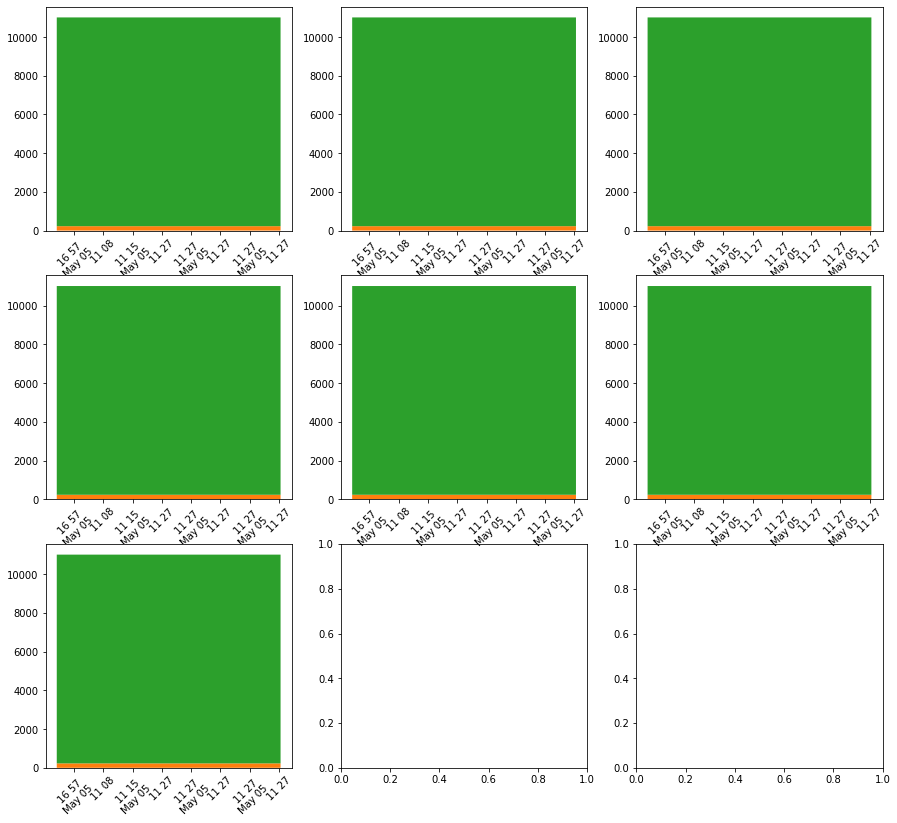

In [211]:
import math
import matplotlib.ticker as ticker

n = len(info) - 1   #math.ceil((len(info)-1)/3)
print(n)
num_cols = 3
num_rows = math.ceil(n/3)
plt.subplots(num_rows,num_cols, figsize=(15, 14), squeeze=False)

for i, df in enumerate(dfs):
    s = f"{num_rows}{num_cols}{i+1}"
    ax = plt.subplot(s)
    plt.stackplot(df["time"], df["using"], df["occupied"], df["free"], labels=['A','B','C'])
    ticklabels = ['']*len(df["time"].index)
    ticklabels[::1] = [item.strftime('%H %M') for item in df["time"][::1]]
    ticklabels[::2] = [item.strftime('%H %M\n%b %m') for item in df["time"][::2]]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.xticks(rotation=45)
# plt.legend(loc='upper left')
plt.show()

In [190]:
print(df["time"][::4])

0     2021-05-21 16:57:39
4     2021-05-25 11:27:09
8     2021-05-25 11:27:31
12    2021-05-25 11:27:53
16    2021-05-25 11:28:14
              ...        
780   2021-05-25 12:38:05
784   2021-05-25 12:38:27
788   2021-05-25 12:38:49
792   2021-05-25 12:39:11
796   2021-05-25 12:39:33
Name: time, Length: 200, dtype: datetime64[ns]


In [214]:
import unittest
# import socketLogger
import logging
import logging.handlers
import pickle
#import cPickle as pickle

def test_StringReceivedIsSameAsStringSent():
    host = 'localhost'
    port = 9000
    stringSent = "hello world!" 
    stringReceived = None
    log_msg = None

    def sendLogToSocket(host,port, stringSent):
        logger = logging.getLogger('mylogger') # to log Led Observer output over a socket
        sh = logging.handlers.SocketHandler(host,port) # handler to write to socket
        logger.addHandler(sh)
        logger.critical(stringSent) 
        logger.removeHandler(sh)
        sh.close()

    import threading
    t = threading.Thread(target=sendLogToSocket, args=(host,port,stringSent)) # socket requires 2 different ports if on the same machine
    t.start() # send log in a thread

    import socket
    serversocket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) #INET => IPv4, STREAM => TCP
    serversocket.bind((host,port)) # 'localhost' => implies only visible within the same machine
    serversocket.listen(1) # accept 1 connection only
    (clientsocket, address) = serversocket.accept()
    chunk = clientsocket.recv(1024)
    print('socketlistener: data received: ', repr(chunk))
    import struct
    slen = struct.unpack(">L", chunk[:4])[0]
    obj = pickle.loads(chunk[4:])
    print('un pickling log: ', repr(obj))
    stringReceived = logging.makeLogRecord(obj)
    #log_msg = logging.makeLogRecord(stringReceived)
    print('socketlistener: converted to log: ', repr(stringReceived))
    clientsocket.close()
    serversocket.close()

    t.join() # wait for the log thread to finish

    print('string sent: ', repr(stringSent), ' received: ', repr(stringReceived.getMessage()))
    assert(stringSent == stringReceived.getMessage())

if __name__ == "__main__":
    test_StringReceivedIsSameAsStringSent()

socketlistener: data received:  b'\x00\x00\x01\xf3}q\x00(X\x04\x00\x00\x00nameq\x01X\x08\x00\x00\x00myloggerq\x02X\x03\x00\x00\x00msgq\x03X\x0c\x00\x00\x00hello world!q\x04X\x04\x00\x00\x00argsq\x05NX\t\x00\x00\x00levelnameq\x06X\x08\x00\x00\x00CRITICALq\x07X\x07\x00\x00\x00levelnoq\x08K2X\x08\x00\x00\x00pathnameq\tX \x00\x00\x00<ipython-input-214-6e07a0051b5a>q\nX\x08\x00\x00\x00filenameq\x0bh\nX\x06\x00\x00\x00moduleq\x0ch\nX\x08\x00\x00\x00exc_infoq\rNX\x08\x00\x00\x00exc_textq\x0eNX\n\x00\x00\x00stack_infoq\x0fNX\x06\x00\x00\x00linenoq\x10K\x13X\x08\x00\x00\x00funcNameq\x11X\x0f\x00\x00\x00sendLogToSocketq\x12X\x07\x00\x00\x00createdq\x13GA\xd8+\x80\xf1\xca\xaa\x00X\x05\x00\x00\x00msecsq\x14G@d\xd4\x08\x00\x00\x00\x00X\x0f\x00\x00\x00relativeCreatedq\x15GA\xe1/\x83M\xb7\xbb\x08X\x06\x00\x00\x00threadq\x16L140057119434496L\nX\n\x00\x00\x00threadNameq\x17X\x08\x00\x00\x00Thread-5q\x18X\x0b\x00\x00\x00processNameq\x19X\x0b\x00\x00\x00MainProcessq\x1aX\x07\x00\x00\x00processq\x1bME-u.'